## Introduction

This project explores taxi ride data in Chicago using the pandas library in Python. We analyze information on taxi rides, weather conditions, and drop-off locations to uncover insights into passenger preferences and the impact of external factors on ride frequency and duration. Leveraging pandas functionalities, we conduct exploratory data analysis and hypothesis testing to derive actionable insights for a hypothetical ride-sharing company operating in Chicago. Through this analysis, we aim to inform strategic decision-making and enhance service quality in the transportation industry.

### Data Exploration

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

In [83]:
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
df_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
df_loop_to_airport = pd.read_csv('/datasets/project_sql_result_07.csv')

In [84]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [85]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [86]:
df_dropoff.duplicated().sum()

0

In [87]:
df_trips.duplicated().sum()

0

After checking the data there is no missing values, no duplicated rows and all the values seem to be in the correct data type hence no changes needed to be made.

### Data Analysis

In [88]:
df_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [89]:
df_trips.nunique()

company_name    64
trips_amount    56
dtype: int64

After checking to see if all the company names are unique, since the data is already sorted in descending order, the top 15 trips would be the first 15 trips in the dataframe. 15 was selected as there are 64 companies and that would be too much data to present.

In [90]:
top_15_trips = df_trips.nlargest(15, 'trips_amount')

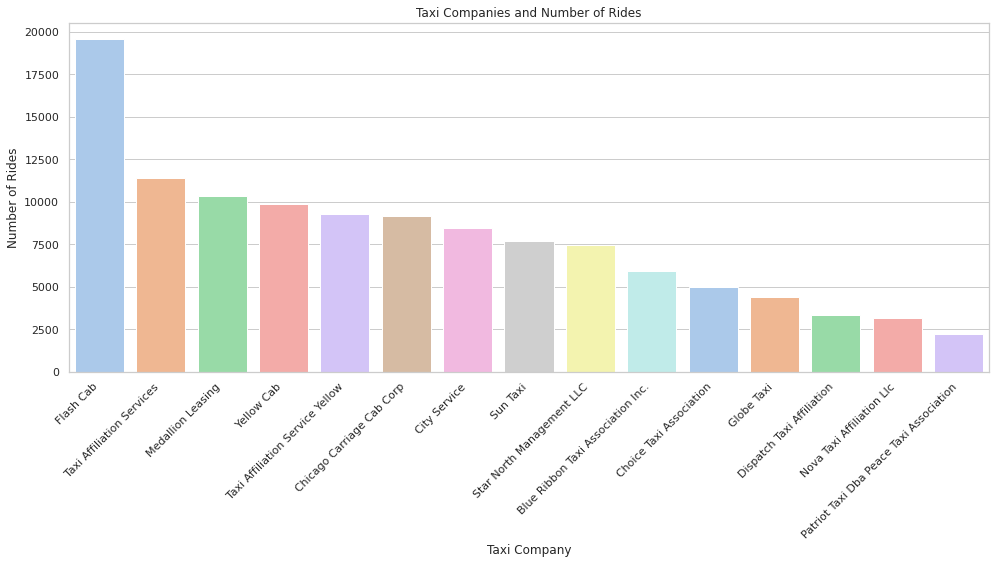

In [91]:
# Set seaborn style
sns.set(style="whitegrid")

# Increase figure size
plt.figure(figsize=(14, 8))

# Plot Taxi Companies and Number of Rides
sns.barplot(x='company_name', y='trips_amount', data=top_15_trips, palette="pastel")
plt.title('Taxi Companies and Number of Rides')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.tight_layout()
plt.show()

From the data above we see that the top 3 companies perform the most rides are Flash Cab, Taxi Affiliation Services and Medallion Leasing. The difference between 1st and second place is significant as Flash Cab has around 8 thousand more trips than second place, this shows their dominance in the industry.

In [92]:
df_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [93]:
df_dropoff.nunique()

dropoff_location_name    94
average_trips            94
dtype: int64

In [94]:
top_10_dropoff = df_dropoff.nlargest(10, 'average_trips')
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


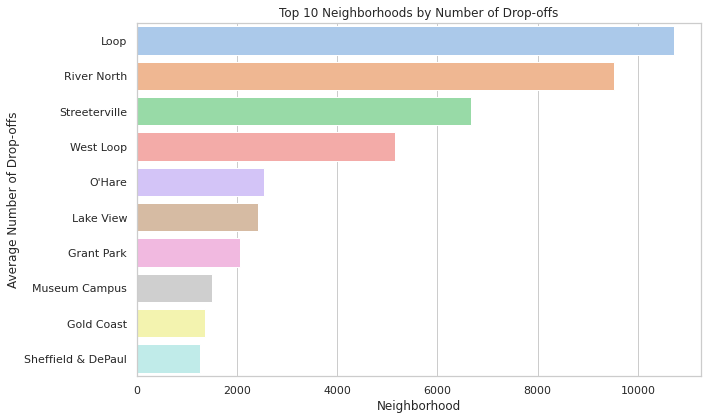

In [95]:
#Graph of the data
colors = sns.color_palette('pastel')

# Plot Top 10 Neighborhoods by Number of Drop-offs
plt.figure(figsize=(10, 6))
sns.barplot(y='dropoff_location_name', x='average_trips', data=top_10_dropoff, palette=colors)
plt.title('Top 10 Neighborhoods by Number of Drop-offs')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Drop-offs')
plt.tight_layout()
plt.show()

From the graph above the top 3 neighborhoods that have the most drop offs are: Lopop, River North and Streetville, with Loop being the only one above 10,000 dropoffs.

In [96]:
df_loop_to_airport

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


### Null Hypothesis

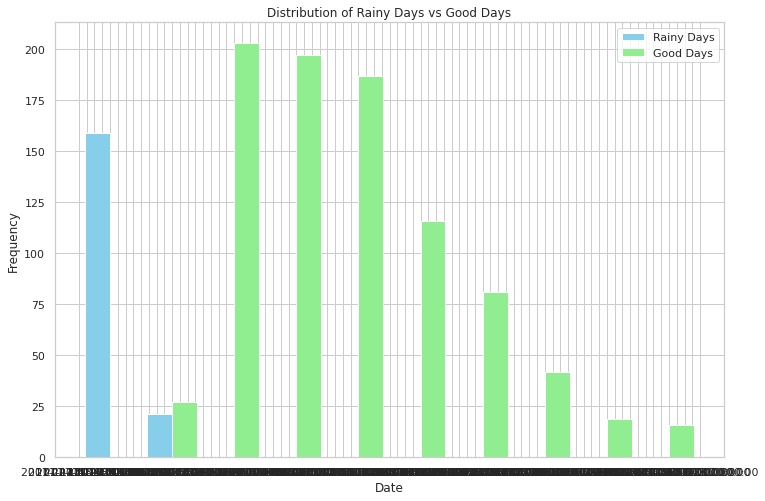

In [97]:
# Separate data into rainy and good days
rainy_days = df_loop_to_airport[df_loop_to_airport['weather_conditions'] == 'Bad']
good_days = df_loop_to_airport[df_loop_to_airport['weather_conditions'] == 'Good']

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist([rainy_days['start_ts'], good_days['start_ts']], color=['skyblue', 'lightgreen'], bins=10, label=['Rainy Days', 'Good Days'])
plt.title('Distribution of Rainy Days vs Good Days')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Null Hypothesis (H0):

The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays as on non-rainy Saturdays.
Mathematically, we can express this as:

H0: μ_rainy = μ_non-rainy

#### Alternative Hypothesis (H1):

The average duration of rides from the Loop to O'Hare International Airport is different on rainy Saturdays compared to non-rainy Saturdays.
Mathematically, we can express this as:

H1: μ_rainy ≠ μ_non-rainy

In [100]:
#rainy saturdays
rainy_saturdays = df_loop_to_airport[df_loop_to_airport['weather_conditions'] =='Bad']
#non-rainy saturdays
non_rainy_saturdays = df_loop_to_airport[df_loop_to_airport['weather_conditions'] =='Good']

I will set the significance level (alpha) at 0.05, which is a common choice in hypothesis testing. This means that I am willing to accept a 5% chance of rejecting the null hypothesis when it is actually true.

In [101]:
# Perform two-sample t-test
t_stat, p_value = ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

# Set significance level (alpha)
alpha = 0.05

# Print t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to suggest that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")

t-statistic: 6.946177714041499
p-value: 6.517970327099473e-12
Reject the null hypothesis. There is sufficient evidence to suggest that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


Since the p-value is significantly smaller than the chosen significance level of 0.05, we reject the null hypothesis. Therefore, there is sufficient evidence to suggest that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. In other words, there is a statistically significant difference in the average ride duration between rainy Saturdays and non-rainy Saturdays.

### Conclusion


- In this analysis, it was identified that Flash Cab, Taxi Affiliation Services, and Medallion Leasing are the top-performing companies in terms of ride volume. Flash Cab stands out with a significant lead over the others, indicating its dominance in the industry.

- Additionally, it was observed that the Loop, River North, and Streeterville are the top three neighborhoods with the highest number of drop-offs. Notably, the Loop stands out as the only neighborhood with over 10,000 drop-offs, highlighting its importance as a destination in the city.

- Furthermore, compelling evidence was found through hypothesis testing that the average duration of rides from the Loop to O'Hare International Airport varies significantly between rainy and non-rainy Saturdays. The calculated t-statistic and p-value support the rejection of the null hypothesis, indicating a statistically significant difference in ride duration under different weather conditions.